In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [51]:
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Regression\USA_Housing.csv')

In [52]:
ds.drop('Address',axis=1,inplace=True)

In [53]:
ds.head(
    
)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [54]:
scaler = MinMaxScaler()
ds = pd.DataFrame(scaler.fit_transform(ds),columns=ds.columns)


In [55]:
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [56]:
X = ds.drop('Price',axis=1)
y = ds['Price']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3500, 5), (1500, 5), (3500,), (1500,))

In [59]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [60]:
y_pred = ridge.predict(X_test)

In [61]:
print('Coefficeient:',ridge.coef_)
print('Intercept:',ridge.intercept_)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))


Coefficeient: [0.79096211 0.46341914 0.36671572 0.00452795 0.43016239]
Intercept: -0.5838347123451537
Mean Squared Error: 0.001673057777934216
R2 score: 0.9146839031708547


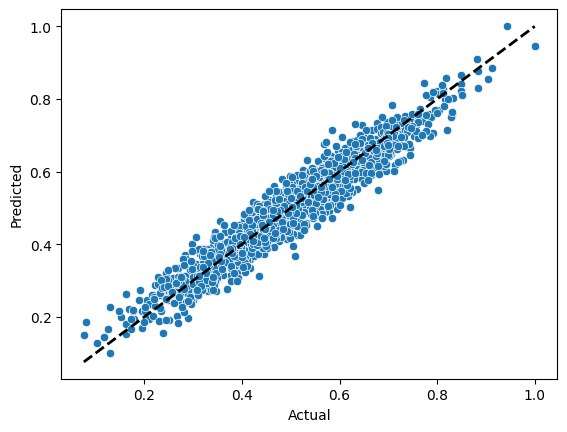

In [62]:
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [63]:
y_pred1 = ridge.predict(X_train)

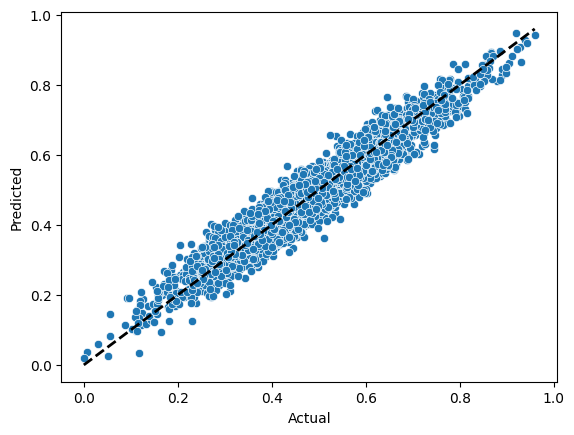

In [64]:
sns.scatterplot(x=y_train,y=y_pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()